## dataset:
Dataset gồm 4 lớp: Cirlce, Square, Triangle, Star phục vụ cho bài toán phân loại

In [6]:
import cv2
import os
import numpy as np

def invert_colors_in_directory(root_dir):
    """
    Duyệt qua tất cả các thư mục con trong 'root_dir', tìm các tệp ảnh 
    (png, jpg, jpeg) và đảo ngược màu sắc của chúng (đen/trắng sang trắng/đen).
    Ảnh đã xử lý sẽ được lưu đè lên ảnh gốc.

    Args:
        root_dir (str): Đường dẫn đến thư mục gốc chứa các thư mục hình dạng (Shapes).
    """
    print(f"Bắt đầu xử lý thư mục gốc: {root_dir}")

    # Duyệt qua thư mục gốc và tất cả các thư mục con (recursive)
    for subdir, dirs, files in os.walk(root_dir):
        print(f"\nĐang xử lý thư mục: {subdir}")
        
        # Tạo thư mục đầu ra nếu cần (để lưu ảnh đã xử lý)
        # Trong ví dụ này, ta lưu đè lên ảnh gốc nên không cần thư mục mới.

        for file in files:
            # Chỉ xử lý các tệp ảnh phổ biến
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                
                # Tạo đường dẫn đầy đủ đến tệp ảnh
                image_path = os.path.join(subdir, file)
                print(f"  Đang xử lý tệp: {file}...", end="")

                try:
                    # 1. Đọc ảnh
                    # Lệnh cv2.IMREAD_GRAYSCALE đảm bảo ảnh được đọc dưới dạng ảnh đơn sắc (đen trắng)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    
                    if image is None:
                        print(f"LỖI: Không thể đọc ảnh tại {image_path}")
                        continue
                    
                    # 2. Đảo ngược màu sắc (Invert)
                    # Trong ảnh thang độ xám (Grayscale), giá trị pixel từ 0 (đen) đến 255 (trắng).
                    # Hàm bitwise_not thực hiện phép toán: New_Pixel = 255 - Old_Pixel
                    inverted_image = cv2.bitwise_not(image)
                    
                    # 3. Lưu ảnh đã xử lý
                    # Lưu đè lên ảnh gốc
                    cv2.imwrite(image_path, inverted_image)
                    print("ĐÃ XONG.")

                except Exception as e:
                    print(f"LỖI XỬ LÝ: Không thể xử lý tệp {file}. Lỗi: {e}")

# --- CẤU HÌNH THƯ MỤC GỐC ---
# Thay thế 'Shapes' bằng đường dẫn thực tế đến thư mục gốc của bạn.
# Dựa trên ảnh của bạn, thư mục gốc là thư mục 'Shapes'.
ROOT_DIRECTORY = 'Shapes' 

# Gọi hàm chính để bắt đầu xử lý
invert_colors_in_directory(ROOT_DIRECTORY)
print("\n--- HOÀN TẤT XỬ LÝ TẤT CẢ CÁC ẢNH ---")

Bắt đầu xử lý thư mục gốc: Shapes

Đang xử lý thư mục: Shapes

Đang xử lý thư mục: Shapes/square
  Đang xử lý tệp: 348.png...ĐÃ XONG.
  Đang xử lý tệp: 1804.png...ĐÃ XONG.
  Đang xử lý tệp: 1810.png...ĐÃ XONG.
  Đang xử lý tệp: 1186.png...ĐÃ XONG.
  Đang xử lý tệp: 412.png...ĐÃ XONG.
  Đang xử lý tệp: 374.png...ĐÃ XONG.
  Đang xử lý tệp: 1838.png...ĐÃ XONG.
  Đang xử lý tệp: 360.png...ĐÃ XONG.
  Đang xử lý tệp: 406.png...ĐÃ XONG.
  Đang xử lý tệp: 1192.png...ĐÃ XONG.
  Đang xử lý tệp: 1179.png...ĐÃ XONG.
  Đang xử lý tệp: 2470.png...ĐÃ XONG.
  Đang xử lý tệp: 2316.png...ĐÃ XONG.
  Đang xử lý tệp: 3008.png...ĐÃ XONG.
  Đang xử lý tệp: 2302.png...ĐÃ XONG.
  Đang xử lý tệp: 2464.png...ĐÃ XONG.
  Đang xử lý tệp: 3752.png...ĐÃ XONG.
  Đang xử lý tệp: 1145.png...ĐÃ XONG.
  Đang xử lý tệp: 1623.png...ĐÃ XONG.
  Đang xử lý tệp: 3034.png...ĐÃ XONG.
  Đang xử lý tệp: 3020.png...ĐÃ XONG.
  Đang xử lý tệp: 1637.png...ĐÃ XONG.
  Đang xử lý tệp: 1151.png...ĐÃ XONG.
  Đang xử lý tệp: 3746.png...ĐÃ XO

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

IMG_SIZE = 28
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    'Shapes',
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='training'
)

val_gen = datagen.flow_from_directory(
    'Shapes',
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='validation'
)

print('Class indices:', train_gen.class_indices)

Found 11976 images belonging to 4 classes.
Found 2994 images belonging to 4 classes.
Class indices: {'circle': 0, 'square': 1, 'star': 2, 'triangle': 3}


## Tạo và train model CNN tương tự

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# -------------------------
# 1) Load dataset from folder
# -------------------------
img_size = 28
batch_size = 32

print("Class mapping:", train_gen.class_indices)

# -------------------------
# 2) Build a simple CNN model
# -------------------------

model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')   # 4 classes
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# -------------------------
# 3) Train model
# -------------------------
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=2
)

# -------------------------
# 4) Save model to file
# -------------------------
model.save("cnn_shape.h5")
print("Model saved as cnn_shape.h5")


Class mapping: {'circle': 0, 'square': 1, 'star': 2, 'triangle': 3}


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,324 (220.02 KB)

 Trainable params: 56,324 (220.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9603 - loss: 0.1262 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 2/2
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 4.7781e-04


Model saved as cnn_shape.h5


## Test lại model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


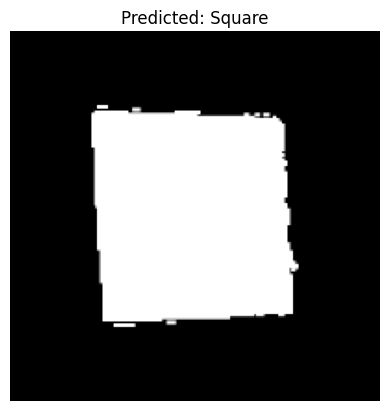

Image: Shapes/square/1344.png
Prediction vector: [[3.6203392e-06 9.9997926e-01 1.5031991e-10 1.7112914e-05]]
Predicted class: Square
--------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


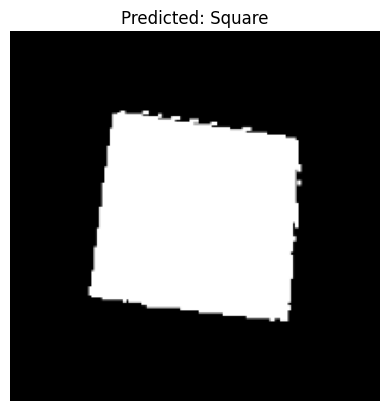

Image: Shapes/square/2989.png
Prediction vector: [[2.624936e-04 9.997036e-01 1.811575e-09 3.381513e-05]]
Predicted class: Square
--------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


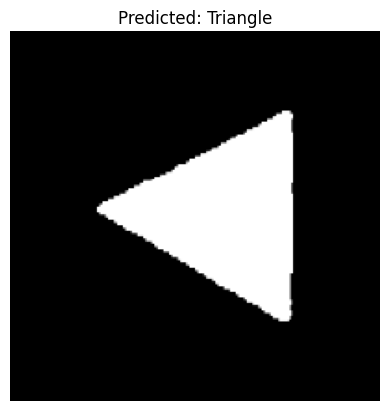

Image: Shapes/triangle/2784.png
Prediction vector: [[9.6091017e-13 4.4844678e-06 1.9769263e-06 9.9999344e-01]]
Predicted class: Triangle
--------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


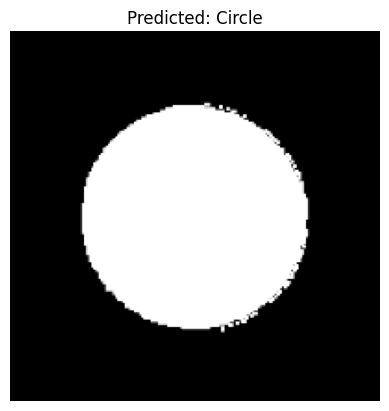

Image: Shapes/circle/1199.png
Prediction vector: [[9.9977428e-01 2.2569354e-04 1.3571534e-10 1.2361248e-09]]
Predicted class: Circle
--------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


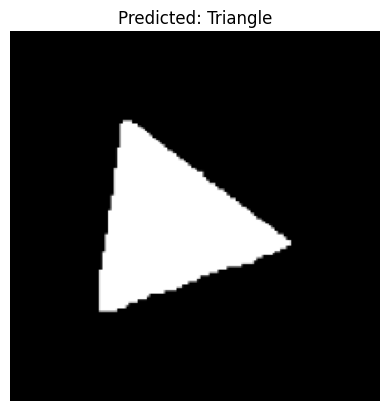

Image: Shapes/triangle/2884.png
Prediction vector: [[1.9418137e-13 1.9304871e-06 1.5677226e-05 9.9998236e-01]]
Predicted class: Triangle
--------


In [13]:
import tensorflow as tf
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

MODEL_PATH = "cnn_shape.h5"
DATASET_DIR = "Shapes"

# Load model
model = tf.keras.models.load_model(MODEL_PATH)

# Class mapping (phải giống lúc train)
class_names = ["Circle", "Square", "Star", "Triangle"]
# Lưu ý: mapping này phụ thuộc vào train_gen.class_indices
# Bạn có thể print(train_gen.class_indices) để chắc chắn thứ tự!

def get_random_image():
    # Chọn folder class bất kỳ
    class_folder = random.choice(os.listdir(DATASET_DIR))
    folder_path = os.path.join(DATASET_DIR, class_folder)
    
    # Chọn ảnh random trong folder đó
    img_name = random.choice(os.listdir(folder_path))
    img_path = os.path.join(folder_path, img_name)
    
    return img_path

def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (28, 28))
    img_norm = img_resized / 255.0
    img_norm = img_norm.reshape(1, 28, 28, 1)
    return img, img_norm  # return both raw + preprocessed


# ----------- TEST LOOP -----------
for _ in range(5):   # test 5 ảnh random
    img_path = get_random_image()

    raw_img, input_img = preprocess_image(img_path)
    pred = model.predict(input_img)
    class_id = np.argmax(pred)
    class_name = class_names[class_id]

    # Plot
    plt.imshow(raw_img, cmap="gray")
    plt.title(f"Predicted: {class_name}")
    plt.axis("off")
    plt.show()

    print("Image:", img_path)
    print("Prediction vector:", pred)
    print("Predicted class:", class_name)
    print("--------")


In [11]:
model.save("cnn_shape.h5")